## Cost Function for Logistic Regression

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import copy,math

In [2]:
x_train=np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train=np.array(([0, 0, 0, 1, 1, 1]))
pos=y_train==1
neg=y_train==0

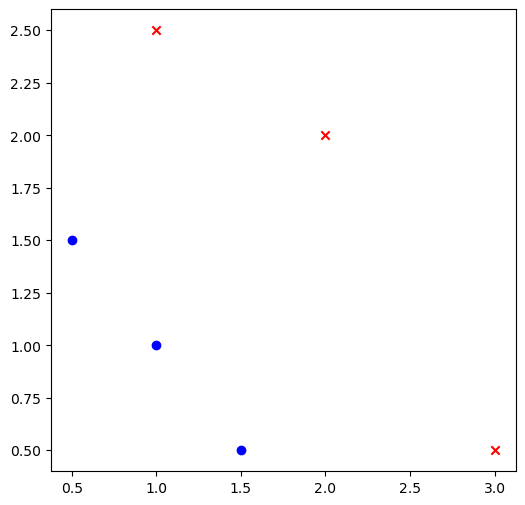

In [10]:
fig,ax=plt.subplots(1,1,figsize=(6,6))
ax.scatter(x_train[pos,0],x_train[pos,1],marker='x',c='r'),
ax.scatter(x_train[neg,0],x_train[neg,1],marker="o",c='b')



In [206]:
x_train=np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train=np.array(([0, 0, 0, 1, 1, 1])).reshape(-1,1)
#logistci regression 

def sigmoid_function(z):
    logistic = 1 / (1 + np.exp(-z))
        
    return logistic


def logistic_cost_function(x,y,w,b):
    m=x.shape[0]
    f_wb=np.zeros((m,))
    logistic=np.zeros((m))
    cost=0
    for j in range(m):
        f_wb[j]=np.dot(x[j],w)+b
        logistic=sigmoid_function(f_wb[j])
        cost+=-y[j]*np.log(logistic)-(1-y[j])*np.log(1-logistic)
    cost=cost/m
    return cost
w = np.array([1, 1])
b=-3
logistic_cost=logistic_cost_function(x_train,y_train,w,b)

- This above value is the difference between actual value and model prediction value using the cost function equation.

## Gradient Descent For Logistic Regression

In [207]:
def sigmoid_function(z):
    logistic = 1 / (1 + np.exp(-z))
    return logistic

def compute_gradient_logistic(X, y, w, b): 
   
    m,n = X.shape
    dj_dw = np.zeros((n,))                         
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid_function(np.dot(X[i],w) + b   )    
        err_i  = f_wb_i  - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m
    dj_db = dj_db/m
        
    return dj_db, dj_dw  

def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
   
    w = copy.deepcopy(w_in)  
    b = b_in
    
    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)   

        w = w - alpha * dj_dw               
        b = b - alpha * dj_db    
#         print(w,b)
      
        
        
    return w, b       

w_tmp = np.array([2.,3.])
b_tmp = 1.

alph = 0.1
iters = 10000

w_final, b_final = gradient_descent(x_train, y_train, w_tmp, b_tmp, alph, iters) 
print(w_final,b_final)


[5.28976498 5.08670859] [-14.24600215]


## Logistic Regression Using sklearn

In [208]:
x_train=np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train=np.array(([0, 0, 0, 1, 1, 1])).ravel()

from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

In [209]:
lr.fit(x_train,y_train)
w=lr.coef_
b=lr.intercept_

In [210]:
model_prediction=lr.predict(x_train)

In [211]:
model_prediction

array([0, 0, 0, 1, 1, 1])